#### Sample questions to ask
1. Are more models using alternative sources of fuel
2. How much have vehicles improved in fuel economy
3. What are the characteristics of SmartWay vehicles
4. For all the models that were produced in 2008 that are still being produced in 2018 how much has mpg improved and which vehicle improved the most

number of samples in each dataset
number of columns in each dataset
duplicate rows in each dataset
datatypes of columns
features with missing values
number of non-null unique values for features in each dataset
what those unique values are and counts for each

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_08 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\all_alpha_08.csv')
df_08.info()
print(df_08['Fuel'].unique())
df_18 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\all_alpha_18.csv')
df_18.info()
print(df_18['Fuel'].unique())
df_18.isnull().sum()
print(df_18['SmartWay'].nunique(True))
print('sales area' + str(df_08['Sales Area'].nunique(True)))
#print('cert reg' + str(df_18['Cert Region'].nunique(True)))
print('Trans ' + str(df_08['Trans'].nunique(True)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 16 columns):
Model                   638 non-null object
Displ                   638 non-null float64
Cyl                     638 non-null object
Trans                   638 non-null object
Drive                   638 non-null object
Fuel                    638 non-null object
Sales Area              638 non-null object
Stnd                    638 non-null object
Underhood ID            638 non-null object
Veh Class               638 non-null object
Air Pollution Score     638 non-null float64
City MPG                638 non-null int64
Hwy MPG                 638 non-null int64
Cmb MPG                 638 non-null int64
Greenhouse Gas Score    638 non-null int64
SmartWay                638 non-null object
dtypes: float64(2), int64(4), object(10)
memory usage: 79.8+ KB
['Gasoline' 'CNG']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 17 columns):
Model

In [7]:
# drop columns from 2008 dataset
df_08.drop(['Stnd', 'Underhood ID'], axis=1, inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7.0,18,26,21,6,yes


In [8]:
# drop columns from 2018 dataset
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID'], axis=1, inplace=True)

# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Smog Rating,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3 e-tron,1.4,4.0,AMS-6,2WD,Gasoline/Electricity,CA,small car,7,34/81,39/86,36/83,10,Elite


In [9]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,sales_area,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,CA,midsize car,7.0,18,26,21,6,yes


In [10]:

# replace spaces with underscores and lowercase labels for 2018 dataset
df_18.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,sales_area,veh_class,smog_rating,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A3 e-tron,1.4,4.0,AMS-6,2WD,Gasoline/Electricity,CA,small car,7,34/81,39/86,36/83,10,Elite


In [13]:
df_18.rename(columns={'smog_rating': 'air_pollution_score'}, inplace=True)

In [14]:
# confirm column labels for 2008 and 2018 datasets are identical
print(df_08.columns)
print(df_18.columns)
df_08.columns == df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'sales_area',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')
Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'sales_area',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [15]:
# make sure they're all identical like this
(df_08.columns == df_18.columns).all()

True

In [17]:
# save new datasets for next section
df_08.to_csv(r'C:\Users\remya\Downloads\DAND\data_08_v1.csv', index=False)
df_18.to_csv(r'C:\Users\remya\Downloads\DAND\data_18_v1.csv', index=False)

In [18]:
# load datasets

df_08 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\data_08_v1.csv')
df_08.head(1)
df_18 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\data_18_v1.csv')
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,sales_area,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A3 e-tron,1.4,4.0,AMS-6,2WD,Gasoline/Electricity,CA,small car,7,34/81,39/86,36/83,10,Elite


In [21]:
# view dimensions of both datasets
print(df_08.shape)
print(df_18.shape)

(638, 14)
(412, 14)


In [22]:
# filter datasets for rows following California standards
df_08 = df_08.query('sales_area == "CA"')
df_18 = df_18.query('sales_area == "CA"')

In [23]:
# confirm only sales area is California
df_08['sales_area'].unique()


array(['CA'], dtype=object)

In [24]:
# confirm only sales area is California
df_18['sales_area'].unique()

array(['CA'], dtype=object)

In [25]:
# drop sales area columns form both datasets
df_08.drop(['sales_area'], axis=1, inplace=True)
df_18.drop(['sales_area'], axis=1, inplace=True)

In [26]:
df_08.shape

(382, 13)

In [27]:
df_18.shape

(204, 13)

In [28]:
# view missing value count for each feature in 2008
df_08.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [29]:
# view missing value count for each feature in 2018
df_18.isnull().sum()

model                    0
displ                   20
cyl                     20
trans                    0
drive                    0
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                 0
hwy_mpg                  0
cmb_mpg                  0
greenhouse_gas_score     0
smartway                 0
dtype: int64

In [30]:
# drop rows with any null values in both datasets
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [31]:
# checks if any of columns in 2008 have null values - should print False
df_08.isnull().sum().any()

False

In [32]:
# checks if any of columns in 2018 have null values - should print False
df_18.isnull().sum().any()

False

In [36]:
# print number of duplicates in 2008 and 2018 datasets
df_08.duplicated().sum()
df_18.duplicated().sum()

2

In [41]:
df_08.drop_duplicates(keep=False, inplace=True)

In [42]:
df_18.drop_duplicates(keep=False, inplace=True)

In [43]:
# print number of duplicates in 2008 and 2018 datasets
df_08.duplicated().sum()
df_18.duplicated().sum()

0

In [44]:
df_08.shape

(378, 13)

In [45]:
df_18.shape

(180, 13)

In [46]:
# save progress for the next section
df_08.to_csv(r'C:\Users\remya\Downloads\DAND\data_08_v2.csv', index=False)
df_18.to_csv(r'C:\Users\remya\Downloads\DAND\data_18_v2.csv', index=False)

In [47]:
df_08 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\data_08_v2.csv')
df_08.info()
df_18 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\data_18_v2.csv')
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 13 columns):
model                   378 non-null object
displ                   378 non-null float64
cyl                     378 non-null object
trans                   378 non-null object
drive                   378 non-null object
fuel                    378 non-null object
veh_class               378 non-null object
air_pollution_score     378 non-null float64
city_mpg                378 non-null int64
hwy_mpg                 378 non-null int64
cmb_mpg                 378 non-null int64
greenhouse_gas_score    378 non-null int64
smartway                378 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 38.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
model                   180 non-null object
displ                   180 non-null float64
cyl                     180 non-null float64
trans                  

Fix cyl datatype
    2008: extract int from string.
    2018: convert float to int.
Fix air_pollution_score datatype
    2008: convert string to float.
    2018: convert int to float.
Fix city_mpg, hwy_mpg, cmb_mpg datatypes
    2008 and 2018: convert string to float.
Fix greenhouse_gas_score datatype
    2008: convert from float to int.

In [48]:
# check value counts for the 2008 cyl column
df_08['cyl'].value_counts()
# Extract int from strings in the 2008 cyl column
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)
# Check value counts for 2008 cyl column again to confirm the change
df_08['cyl'].value_counts()

4    206
6    121
5     44
8      7
Name: cyl, dtype: int64

In [49]:
# convert 2018 cyl column to int
df_18['cyl'] = df_18.cyl.astype(int)

In [50]:
# save progress for the next section
df_08.to_csv(r'C:\Users\remya\Downloads\DAND\data_08_v3.csv', index=False)
df_18.to_csv(r'C:\Users\remya\Downloads\DAND\data_18_v3.csv', index=False)

In [52]:
df_08 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\data_08_v3.csv')
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18,26,21,6,yes


In [53]:
df_18 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\data_18_v3.csv')
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite


In [55]:
# try using pandas' to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
df_08['air_pollution_score'] = df_08.air_pollution_score.astype(float)

Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [59]:
df_18[df_18.city_mpg == '34/81']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite


In [56]:
# First, let's get all the hybrids in 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [57]:
# hybrids in 2018
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite
3,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
4,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
5,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
6,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
7,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,3,23/55,25/57,24/56,8,Yes
8,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Gasoline/Electricity,small car,7,36/117,33/101,35/109,10,Elite
9,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Gasoline/Electricity,small car,7,36/117,33/101,35/109,10,Elite
11,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline/Electricity,midsize car,3,23/56,29/71,25/62,10,Yes
33,CHEVROLET Volt,1.5,4,CVT,2WD,Gasoline/Electricity,small car,3,43/113,42/99,42/106,10,Yes


We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [65]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_18.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_18.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 179
Data columns (total 13 columns):
model                   34 non-null object
displ                   34 non-null float64
cyl                     34 non-null int64
trans                   34 non-null object
drive                   34 non-null object
fuel                    34 non-null object
veh_class               34 non-null object
air_pollution_score     34 non-null int64
city_mpg                34 non-null object
hwy_mpg                 34 non-null object
cmb_mpg                 34 non-null object
greenhouse_gas_score    34 non-null int64
smartway                34 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 3.7+ KB


In [66]:
# columns to split by "/"
split_columns = ['fuel',  'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [67]:
# this dataframe holds info for the FIRST fuel type of the hybrid
# aka the values before the "/"s
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline,small car,7,34,39,36,10,Elite
3,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
4,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
5,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
6,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
7,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,3,23,25,24,8,Yes
8,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Gasoline,small car,7,36,33,35,10,Elite
9,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Gasoline,small car,7,36,33,35,10,Elite
11,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline,midsize car,3,23,29,25,10,Yes
33,CHEVROLET Volt,1.5,4,CVT,2WD,Gasoline,small car,3,43,42,42,10,Yes


In [68]:
# this dataframe holds info for the SECOND fuel type of the hybrid
# aka the values before the "/"s
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Electricity,small car,7,81,86,83,10,Elite
3,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,small car,3,66,78,71,10,Yes
4,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,small car,7,70,75,72,10,Elite
5,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,small car,7,66,68,67,10,Elite
6,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,large car,3,62,68,64,9,Yes
7,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Electricity,standard SUV,3,55,57,56,8,Yes
8,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Electricity,small car,7,117,101,109,10,Elite
9,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Electricity,small car,7,117,101,109,10,Elite
11,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Electricity,midsize car,3,56,71,62,10,Yes
33,CHEVROLET Volt,1.5,4,CVT,2WD,Electricity,small car,3,113,99,106,10,Yes


In [69]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline,small car,7,34,39,36,10,Elite
3,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
4,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
5,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
6,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
7,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,3,23,25,24,8,Yes
8,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Gasoline,small car,7,36,33,35,10,Elite
9,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Gasoline,small car,7,36,33,35,10,Elite
11,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline,midsize car,3,23,29,25,10,Yes
33,CHEVROLET Volt,1.5,4,CVT,2WD,Gasoline,small car,3,43,42,42,10,Yes


In [70]:
# drop the original hybrid rows
df_18.drop(hb_18.index, inplace=True)

# add in our newly separated rows
df_18 = df_18.append(new_rows, ignore_index=True)

In [71]:
# check that all the original hybrid rows with "/"s are gone
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [72]:
df_18.shape

(214, 13)

In [73]:
# convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = df_08.air_pollution_score.astype(float)

In [74]:
# convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18.air_pollution_score.astype(float)

In [75]:
df_08.to_csv(r'C:\Users\remya\Downloads\DAND\data_08_v4.csv', index=False)
df_18.to_csv(r'C:\Users\remya\Downloads\DAND\data_18_v4.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 13 columns):
model                   378 non-null object
displ                   378 non-null float64
cyl                     378 non-null int64
trans                   378 non-null object
drive                   378 non-null object
fuel                    378 non-null object
veh_class               378 non-null object
air_pollution_score     378 non-null float64
city_mpg                378 non-null int64
hwy_mpg                 378 non-null int64
cmb_mpg                 378 non-null int64
greenhouse_gas_score    378 non-null int64
smartway                378 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 38.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
model                   214 non-null object
displ                   214 non-null float64
cyl                     214 non-null int64
trans                   21

In [77]:
df_08 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\data_08_v4.csv')
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18,26,21,6,yes


In [76]:
df_18 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\data_08_v4.csv')
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18,26,21,6,yes


In [78]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg','cmb_mpg']
for c in mpg_columns:
    df_08[c] = df_08[c].astype(float)
    df_18[c] = df_18[c].astype(float)

In [90]:
# convert from float to int
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype(np.int64)

In [91]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [92]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [93]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [106]:
# Save your final CLEAN datasets as new files!
df_08.to_csv(r'C:\Users\remya\Downloads\DAND\clean_08.csv', index=False)
df_18.to_csv(r'C:\Users\remya\Downloads\DAND\clean_18.csv', index=False)

In [107]:
df_08 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\clean_08.csv')
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes


In [109]:
df_18 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\clean_18.csv')
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes


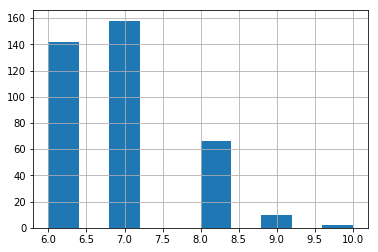

In [110]:
df_08['greenhouse_gas_score'].hist()

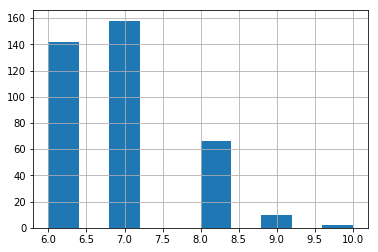

In [100]:
df_18['greenhouse_gas_score'].hist()

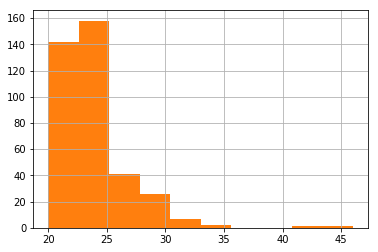

In [102]:
df_08['cmb_mpg'].hist()

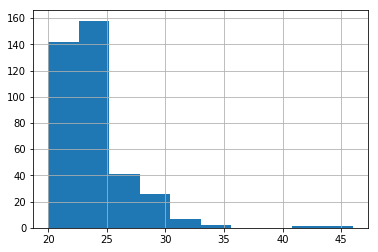

In [103]:
df_18['cmb_mpg'].hist()

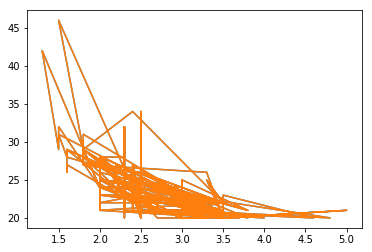

In [104]:
plt.plot(df_08['displ'], df_08['cmb_mpg'])
plt.plot(df_18['displ'], df_18['cmb_mpg'])

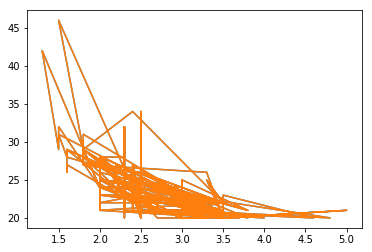

In [105]:
plt.plot(df_08['displ'], df_08['cmb_mpg'])
plt.plot(df_18['displ'], df_18['cmb_mpg'])

In [111]:
df_08 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\clean_08.csv')
df_08.head(1)
df_18 = pd.read_csv(r'C:\Users\remya\Downloads\DAND\clean_18.csv')
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes


In [ ]:
Create combined dataset

In [112]:
# rename 2008 columns to sepearte from 2018
df_08.rename(columns=lambda x: x[:10] + "_2008" , inplace=True)

In [113]:
# view to check names
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
1,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
2,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
3,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes
4,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes


In [114]:
# merge datasets
df_combined = df_08.merge(df_18, left_on='model_2008', right_on='model', how='inner')

In [ ]:
# view to check merge
df_combined.head()
df_combined.info()

In [116]:
df_combined.to_csv(r'C:\Users\remya\Downloads\DAND\combined_dataset.csv', index=False)

In [119]:
df = pd.read_csv(r'C:\Users\remya\Downloads\DAND\combined_dataset.csv')

### 1. Create a new dataframe, `model_mpg`, that contain the mean combined mpg values in 2008 and 2018 for each unique model

To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.

In [120]:
model_mpg = df.groupby('model').mean()[['cmb_mpg_2008','cmb_mpg' ]]

In [121]:
model_mpg.head(1)

,cmb_mpg_2008,cmb_mpg
model,,
ACURA TL,20.666667,20.666667


### 2. Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [122]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']

In [123]:
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA TL,20.666667,20.666667,0.0
ACURA TSX,23.000000,23.000000,0.0
AUDI A3,24.500000,24.500000,0.0
AUDI A4,24.000000,24.000000,0.0
AUDI TT Coupe,26.000000,26.000000,0.0


### 3. Find the vehicle that improved the most
Find the max mpg change, and then use query or indexing to see what model it is!

In [124]:
max_change = model_mpg['mpg_change'].max()

In [125]:
model_mpg[model_mpg['mpg_change'] == max_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA TL,20.666667,20.666667,0.0
ACURA TSX,23.000000,23.000000,0.0
AUDI A3,24.500000,24.500000,0.0
AUDI A4,24.000000,24.000000,0.0
AUDI TT Coupe,26.000000,26.000000,0.0
AUDI TT Roadster,25.000000,25.000000,0.0
BMW 328ci,24.500000,24.500000,0.0
BMW 328ci Convertible,23.000000,23.000000,0.0
BMW 328cxi,22.666667,22.666667,0.0


In [126]:
idx = model_mpg.mpg_change.idxmax()
idx

'ACURA TL'

In [127]:
model_mpg.loc[idx]

cmb_mpg_2008    20.666667
cmb_mpg         20.666667
mpg_change       0.000000
Name: ACURA TL, dtype: float64